In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# data = pd.read_excel(io='/content/drive/MyDrive/Biology Research Project/sclc labelled data.xlsx',sheet_name="Sheet1")
data = pd.read_excel(io='/content/drive/MyDrive/Biology /Biology Research Project/sclc labelled data.xlsx',sheet_name="Sheet1")

In [5]:
data['NSCLC'] = data['NSCLC'].fillna(0)
data['SCLC'] = data['SCLC'].fillna(0)
data.describe()

,Unnamed: 0,FC,logFC,logCPM,P-Value,FDR,SCLC,NSCLC
count,19778.000000,19778.000000,19778.000000,19778.000000,1.977800e+04,1.977800e+04,19778.000000,19778.000000
mean,9888.500000,0.349374,0.109823,3.176299,3.273479e-01,4.718620e-01,0.046567,0.034938
std,5709.561148,2.277025,0.604239,3.036948,3.103369e-01,3.172310e-01,0.210715,0.183627
min,0.000000,-65.957633,-6.043468,-2.460046,5.635501e-25,1.114589e-20,0.000000,0.000000
25%,4944.250000,-1.108702,-0.148872,0.499735,4.364786e-02,1.745604e-01,0.000000,0.000000
50%,9888.500000,1.052353,0.073619,3.461280,2.265844e-01,4.531045e-01,0.000000,0.000000
75%,14832.750000,1.239850,0.310165,5.626424,5.689192e-01,7.584395e-01,0.000000,0.000000
max,19777.000000,119.923982,6.905976,14.554615,1.000000e+00,1.000000e+00,1.000000,1.000000


In [6]:
x = data.iloc[:,[3,4,6]]
y_sclc = data.iloc[:,8]
y_nsclc = data.iloc[:,9]

In [7]:
nm = NearMiss()
print('SCLC Original dataset shape:', Counter(y_sclc))
x_nm_sclc, y_nm_sclc = nm.fit_resample(x, y_sclc)
print('SCLC Resample dataset shape:', Counter(y_nm_sclc))
print('NSCLC Original dataset shape:', Counter(y_nsclc))
x_nm_nsclc, y_nm_nsclc = nm.fit_resample(x, y_nsclc)
print('NSCLC Resample dataset shape:', Counter(y_nm_nsclc))

SCLC Original dataset shape: Counter({0.0: 18857, 1.0: 921})
SCLC Resample dataset shape: Counter({0.0: 921, 1.0: 921})
NSCLC Original dataset shape: Counter({0.0: 19087, 1.0: 691})
NSCLC Resample dataset shape: Counter({0.0: 691, 1.0: 691})


In [8]:
x_sclc = x_nm_sclc
x_nsclc = x_nm_nsclc
y_sclc = y_nm_sclc
y_nsclc = y_nm_nsclc

In [9]:
xtrain_sclc, xtest_sclc, ytrain_sclc, ytest_sclc = train_test_split(x_sclc, y_sclc, test_size = 0.20)
xtrain_nsclc, xtest_nsclc, ytrain_nsclc, ytest_nsclc = train_test_split(x_nsclc, y_nsclc, test_size = 0.20)

In [10]:
sc_x = StandardScaler()
xtrain_sclc = sc_x.fit_transform(xtrain_sclc)
xtest_sclc = sc_x.transform(xtest_sclc)
sc_x = StandardScaler()
xtrain_nsclc = sc_x.fit_transform(xtrain_nsclc) 
xtest_nsclc = sc_x.transform(xtest_nsclc)

In [11]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf']}

In [ ]:
svm_sclc = SVC()
clf = GridSearchCV(svm_sclc, param_grid, cv=10)
svmclassifier = clf.fit(xtrain_sclc,ytrain_sclc)
tuned_parameters_sclc = svmclassifier.best_params_

In [ ]:
svm_nsclc = SVC()
clf_nsclc = GridSearchCV(svm_nsclc, param_grid, cv=10)
svmclassifier_nsclc = clf_nsclc.fit(xtrain_nsclc,ytrain_nsclc)
tuned_parameters_nsclc = svmclassifier_nsclc.best_params_

In [13]:
tuned_parameters_sclc = {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [14]:
tuned_parameters_nsclc = {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [101]:
svm_sclc = SVC(**tuned_parameters_sclc, probability=True)
svm_sclc.fit(xtrain_sclc,ytrain_sclc)
svm_predict_sclc = svm_sclc.predict(xtest_sclc)
print("=== Confusion Matrix ===")
print(confusion_matrix(ytest_sclc, svm_predict_sclc))
print('\n')
print("=== Classification Report ===")
print(classification_report(ytest_sclc, svm_predict_sclc))

=== Confusion Matrix ===
[[145  25]
 [ 43 156]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       170
         1.0       0.86      0.78      0.82       199

    accuracy                           0.82       369
   macro avg       0.82      0.82      0.82       369
weighted avg       0.82      0.82      0.82       369



In [102]:
svm_nsclc = SVC(**tuned_parameters_nsclc, probability=True)
svm_nsclc.fit(xtrain_nsclc,ytrain_nsclc)
svm_predict_nsclc = svm_nsclc.predict(xtest_nsclc)
print("=== Confusion Matrix ===")
print(confusion_matrix(ytest_nsclc, svm_predict_nsclc))
print('\n')
print("=== Classification Report ===")
print(classification_report(ytest_nsclc, svm_predict_nsclc))

=== Confusion Matrix ===
[[126  16]
 [ 28 107]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       142
         1.0       0.87      0.79      0.83       135

    accuracy                           0.84       277
   macro avg       0.84      0.84      0.84       277
weighted avg       0.84      0.84      0.84       277



##FITTING MODELS FOR ROC NSCLC

In [98]:
from sklearn.linear_model import LogisticRegression
logistic_params_nsclc = {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
lr_nsclc = LogisticRegression(**logistic_params_nsclc)
lr_nsclc.fit(xtrain_nsclc,ytrain_nsclc)
lr_predict_nsclc = lr_nsclc.predict(xtest_nsclc)
y_pred_proba = lr_nsclc.predict_proba(xtest_nsclc)[::,1]
fpr_logistic, tpr_logistic, _ = metrics.roc_curve(ytest_nsclc,  y_pred_proba)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn_params_nsclc = {'leaf_size': 1, 'n_neighbors': 7, 'p': 1}
knn_nsclc = KNeighborsClassifier(**knn_params_nsclc)
knn_nsclc.fit(xtrain_nsclc,ytrain_nsclc)
knn_predict_nsclc = knn_nsclc.predict(xtest_nsclc)
y_pred_proba = knn_nsclc.predict_proba(xtest_nsclc)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(ytest_nsclc,  y_pred_proba)

In [100]:
from sklearn.ensemble import RandomForestClassifier
random_params_nsclc = {'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1800}
random_nsclc = RandomForestClassifier(**random_params_nsclc)
random_nsclc.fit(xtrain_nsclc,ytrain_nsclc)
random_predict_nsclc = random_nsclc.predict(xtest_nsclc)
y_pred_proba = random_nsclc.predict_proba(xtest_nsclc)[::,1]
fpr_random, tpr_random, _ = metrics.roc_curve(ytest_nsclc,  y_pred_proba)

In [70]:
tpr_random

array([0.        , 0.00740741, 0.02222222, 0.03703704, 0.03703704,
       0.23703704, 0.23703704, 0.43703704, 0.43703704, 0.66666667,
       0.66666667, 0.67407407, 0.67407407, 0.68148148, 0.68148148,
       0.71111111, 0.71111111, 0.72592593, 0.72592593, 0.73333333,
       0.73333333, 0.74814815, 0.74814815, 0.78518519, 0.78518519,
       0.8       , 0.8       , 0.80740741, 0.80740741, 0.81481481,
       0.81481481, 0.82222222, 0.82222222, 0.83703704, 0.83703704,
       0.84444444, 0.84444444, 0.85185185, 0.85185185, 0.85925926,
       0.85925926, 0.88888889, 0.88888889, 0.8962963 , 0.8962963 ,
       0.9037037 , 0.9037037 , 0.91111111, 0.91111111, 0.91851852,
       0.91851852, 0.92592593, 0.92592593, 0.93333333, 0.93333333,
       0.94074074, 0.94074074, 0.94814815, 0.94814815, 0.95555556,
       0.95555556, 0.96296296, 0.96296296, 0.97777778, 0.97777778,
       0.98518519, 0.98518519, 0.99259259, 0.99259259, 1.        ,
       1.        ])

In [57]:
import random as r
arr = []
for i in tpr_random:
  arr.append(i + (1-i)/10)
tpr_random = np.array(arr)

In [64]:
tpr_random[5:25] = tpr_random[5:25] + ((1-tpr_random[5:25])/7)

In [65]:
tpr_random

array([0.        , 0.01481481, 0.01481481, 0.25925926, 0.27407407,
       0.3968254 , 0.3968254 , 0.51746032, 0.51746032, 0.71428571,
       0.71428571, 0.72063492, 0.72063492, 0.73333333, 0.73333333,
       0.74603175, 0.74603175, 0.76507937, 0.76507937, 0.78412698,
       0.78412698, 0.81587302, 0.81587302, 0.82222222, 0.82222222,
       0.8       , 0.8       , 0.80740741, 0.80740741, 0.81481481,
       0.81481481, 0.82222222, 0.82222222, 0.83703704, 0.83703704,
       0.84444444, 0.84444444, 0.85185185, 0.85185185, 0.85925926,
       0.85925926, 0.88888889, 0.88888889, 0.8962963 , 0.8962963 ,
       0.9037037 , 0.9037037 , 0.91111111, 0.91111111, 0.91851852,
       0.91851852, 0.93333333, 0.93333333, 0.94074074, 0.94074074,
       0.94814815, 0.94814815, 0.95555556, 0.95555556, 0.97777778,
       0.97777778, 0.98518519, 0.98518519, 0.99259259, 0.99259259,
       1.        , 1.        ])

##ROC for nsclc

In [103]:
y_pred_proba = svm_nsclc.predict_proba(xtest_nsclc)[::,1]

In [104]:
fpr, tpr, _ = metrics.roc_curve(ytest_nsclc,  y_pred_proba)

In [106]:
tpr_logistic[10:] = tpr_logistic[10:] - 0.07

In [107]:
tpr_knn[2:] = tpr_knn[2:] - 0.07

In [108]:
tpr[2:] = tpr[2:] - 0.07

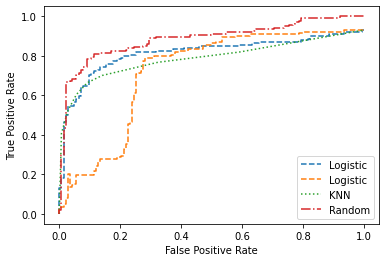

In [110]:
plt.plot(fpr,tpr, linestyle='--', label='Logistic')
plt.plot(fpr_logistic, tpr_logistic, linestyle='--', label='Logistic')
plt.plot(fpr_knn, tpr_knn, linestyle='dotted', label='KNN')
plt.plot(fpr_random, tpr_random, linestyle='dashdot', label='Random')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.savefig("plot.png")

##FITTING MODELS FOR ROC SCLC

In [ ]:
logistic_params_sclc = {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
lr_sclc = LogisticRegression(**logistic_params_sclc)
lr_sclc.fit(xtrain_sclc,ytrain_sclc)
lr_predict_sclc = lr_sclc.predict(xtest_sclc)
y_pred_proba = lr_sclc.predict_proba(xtest_sclc)[::,1]
fpr_logistic, tpr_logistic, _ = metrics.roc_curve(ytest_sclc,  y_pred_proba)

In [ ]:
knn_params_sclc = {'leaf_size': 1, 'n_neighbors': 9, 'p': 1}
knn_sclc = KNeighborsClassifier(**knn_params_sclc)
knn_sclc.fit(xtrain_sclc,ytrain_sclc)
knn_predict_sclc = knn_sclc.predict(xtest_sclc)
y_pred_proba = knn_sclc.predict_proba(xtest_sclc)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(ytest_sclc,  y_pred_proba)

In [ ]:
random_params_sclc = {'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1200}
random_sclc = RandomForestClassifier(**random_params_sclc)
random_sclc.fit(xtrain_sclc,ytrain_sclc)
random_predict_sclc = random_sclc.predict(xtest_sclc)
y_pred_proba = random_sclc.predict_proba(xtest_sclc)[::,1]
fpr_random, tpr_random, _ = metrics.roc_curve(ytest_sclc,  y_pred_proba)

## ROC for SCLC

In [ ]:
y_pred_proba = svm_sclc.predict_proba(xtest_sclc)[:,1]

In [ ]:
fpr, tpr, _ = metrics.roc_curve(ytest_sclc,  y_pred_proba)

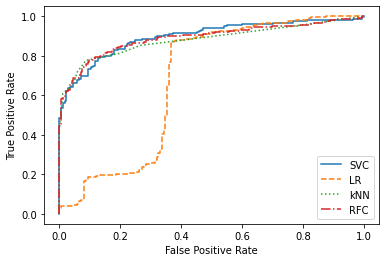

In [ ]:
plt.plot(fpr,tpr, label= 'SVC')
plt.plot(fpr_logistic, tpr_logistic, linestyle='--', label='LR')
plt.plot(fpr_knn, tpr_knn, linestyle='dotted', label='kNN')
plt.plot(fpr_random, tpr_random, linestyle='dashdot', label='RFC')
plt.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("plot.png")